In [1847]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error as mae
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

## Описание признаков датасета (далее - ДС)
Id - идентификационный номер квартиры   
DistrictId - идентификационный номер района   
Rooms - количество комнат   
Square - площадь   
LifeSquare - жилая площадь   
KitchenSquare - площадь кухни   
Floor - этаж  
HouseFloor - количество этажей в доме   
HouseYear - год постройки дома   
Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности   
Social_1, Social_2, Social_3 - социальные показатели местности   
Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья   
Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров   
Price - цена квартиры   

## Функции

In [1907]:
# преобразует категориальные в бинарные признаки
def featuers_obj(column, df):
    for col in column:
        value_true = df[col].unique()[1]
        df[col] = df[col] == value_true

# удаляет выбросы

def drop_outliers(column, df):
    IQR=df[column].quantile(q=0.75)-df[column].quantile(q=0.25)
    first_quantile=df[column].quantile(q=0.25)-IQR*1.5
    third_quantile=df[column].quantile(q=0.75)+IQR*1.5
    df.drop(df[(df[column]<first_quantile)|(df[column]>third_quantile)].index, axis=0, inplace=True)

# приведение в тестовой выборки выбросов к среднему значению признака

def outliers_mean (column, df):
    IQR=df[column].quantile(q=0.75)-df[column].quantile(q=0.25)
    first_quantile=df[column].quantile(q=0.25)-IQR*1.5
    third_quantile=df[column].quantile(q=0.75)+IQR*1.5
    index_exchange = df[(df[column]<first_quantile)|(df[column]>third_quantile)].index
    df.loc[index_exchange, column] = df[column].mean()

# расчет метрики
        
def evaluate_pred(x_train, y_train, x_test, y_test, model):
    
    rf_model.fit(x_train, y_train)
    
    y_train_pred = model.predict(x_train) 
    y_test_pred = model.predict(x_test)
    
    r2_train = r2_score(y_train, y_train_pred)    
    r2_test = r2_score(y_test, y_test_pred)
    
    print(f'R2_train = {r2_train}')
    print(f'R2_test = {r2_test}')
    

## Локация данных

In [1849]:
TRAIN_DATASET_PATH = '/Users/circle/Documents/Project/train.csv'
TEST_DATASET_PATH = '/Users/circle/Documents/Project/test.csv'
TEST_DATASET_PRED_PATH = '/Users/circle/Documents/Project/PleshkovAA_prediction.csv'


## Анализируем данные

In [1850]:
df = pd.read_csv(TRAIN_DATASET_PATH)

In [1851]:
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [1852]:
df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [1853]:
df.shape

(10000, 20)

In [1854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [1855]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


### Определяем категориальные признаки

In [1856]:
data_obj=df.select_dtypes(include=object).columns
data_obj.tolist()

['Ecology_2', 'Ecology_3', 'Shops_2']

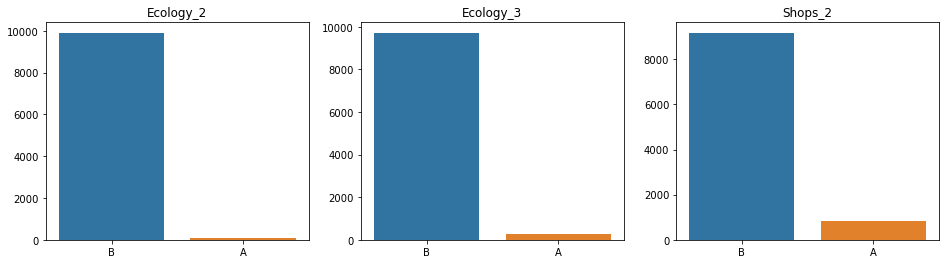

In [1857]:
plt.figure(figsize = (16,4))

for i, columns in enumerate(data_obj):
    x = df[columns].value_counts()
    plt.subplot(1,3,1+i)
    plt.title(columns)
    sns.barplot(x.index, x.values)
    
plt.show()


In [1858]:
df.corr()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
Id,1.000000,0.012973,-0.005847,-0.010071,0.018449,0.019880,0.001348,-0.008376,0.005004,0.018097,-0.000772,-0.002033,-0.009358,-0.003879,0.001502,-0.008718,0.009880
DistrictId,0.012973,1.000000,0.071432,-0.026613,-0.019910,0.040358,-0.120373,-0.149051,0.013430,0.065294,0.246463,0.167479,0.136095,0.304335,0.306147,0.174214,0.265100
Rooms,-0.005847,0.071432,1.000000,0.662893,0.131336,0.005123,-0.000665,-0.029302,-0.010612,-0.032347,0.075980,0.071335,0.012811,0.042857,0.063557,0.053618,0.550291
Square,-0.010071,-0.026613,0.662893,1.000000,0.196129,0.008320,0.114791,0.081505,-0.009032,-0.064479,-0.070690,-0.043120,0.035241,-0.039748,-0.022960,0.021357,0.520075
LifeSquare,0.018449,-0.019910,0.131336,0.196129,1.000000,-0.001195,0.024559,0.027442,-0.002210,-0.023629,-0.048363,-0.039283,0.012763,-0.026867,-0.024762,-0.007569,0.081292
KitchenSquare,0.019880,0.040358,0.005123,0.008320,-0.001195,1.000000,-0.011397,0.000780,0.000958,-0.005622,0.043379,0.037805,-0.015140,0.009472,0.043170,0.010216,0.028864
Floor,0.001348,-0.120373,-0.000665,0.114791,0.024559,-0.011397,1.000000,0.418986,0.000928,-0.016133,-0.044914,-0.016560,-0.002237,-0.138294,-0.065537,0.024264,0.128715
HouseFloor,-0.008376,-0.149051,-0.029302,0.081505,0.027442,0.000780,0.418986,1.000000,-0.000864,-0.004362,-0.020801,0.007194,-0.008137,-0.143973,-0.068728,0.026279,0.088280
HouseYear,0.005004,0.013430,-0.010612,-0.009032,-0.002210,0.000958,0.000928,-0.000864,1.000000,0.001465,0.003026,0.001970,0.000819,-0.011969,0.011245,0.003681,0.004305
Ecology_1,0.018097,0.065294,-0.032347,-0.064479,-0.023629,-0.005622,-0.016133,-0.004362,0.001465,1.000000,0.026464,0.009264,-0.124068,-0.043547,0.030873,-0.076749,-0.058381


## Приведение категориальных к числовым признакам

In [1859]:
featuers_obj(data_obj,df)

In [1860]:
for i in data_obj:
    print(df[i].value_counts())

False    9903
True       97
Name: Ecology_2, dtype: int64
False    9725
True      275
Name: Ecology_3, dtype: int64
False    9175
True      825
Name: Shops_2, dtype: int64


## Обработка выбросов

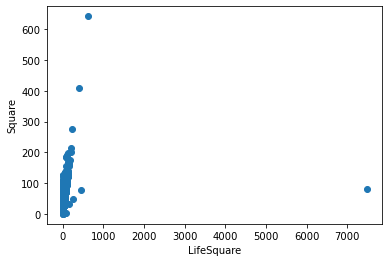

In [1861]:
plt.scatter(df['LifeSquare'], df['Square'])
plt.xlabel('LifeSquare')
plt.ylabel('Square')
plt.show()

In [1862]:
df['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

In [1863]:
df['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

In [1864]:
df['KitchenSquare'].describe()

count    10000.000000
mean         6.273300
std         28.560917
min          0.000000
25%          1.000000
50%          6.000000
75%          9.000000
max       2014.000000
Name: KitchenSquare, dtype: float64

In [1865]:
# Наблюдаются выбросы по признакам - уберем их

drop_outliers('Square', df)

In [1866]:
drop_outliers('LifeSquare', df)

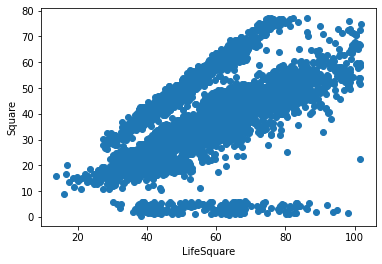

In [1867]:
plt.scatter(df['Square'], df['LifeSquare'])
plt.xlabel('LifeSquare')
plt.ylabel('Square')
plt.show()

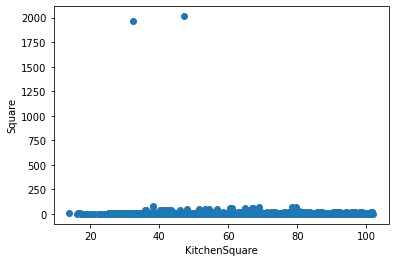

In [1868]:
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('KitchenSquare')
plt.ylabel('Square')
plt.show()

In [1869]:
drop_outliers('KitchenSquare', df)

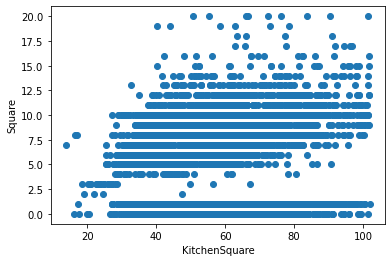

In [1870]:
plt.scatter(df['Square'], df['KitchenSquare'])
plt.xlabel('KitchenSquare')
plt.ylabel('Square')
plt.show()

## Обработка пропусков и наличие целевых признаков

In [1871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9541 non-null   int64  
 1   DistrictId     9541 non-null   int64  
 2   Rooms          9541 non-null   float64
 3   Square         9541 non-null   float64
 4   LifeSquare     7495 non-null   float64
 5   KitchenSquare  9541 non-null   float64
 6   Floor          9541 non-null   int64  
 7   HouseFloor     9541 non-null   float64
 8   HouseYear      9541 non-null   int64  
 9   Ecology_1      9541 non-null   float64
 10  Ecology_2      9541 non-null   bool   
 11  Ecology_3      9541 non-null   bool   
 12  Social_1       9541 non-null   int64  
 13  Social_2       9541 non-null   int64  
 14  Social_3       9541 non-null   int64  
 15  Healthcare_1   5016 non-null   float64
 16  Helthcare_2    9541 non-null   int64  
 17  Shops_1        9541 non-null   int64  
 18  Shops_2 

In [1872]:
# В признаках LifeSquare заменим пропущенные значения на медианные

df['LifeSquare'] = df['LifeSquare'].fillna(df['LifeSquare'].median(axis=0),axis=0)

In [1873]:
# В признаке Healthcare_1 пропущено много наблюдений и по нему наблюдается слабая корреляция 
# в контексте этого принял решение удалить его

df.drop(['Healthcare_1'], axis=1, inplace=True)

## Целевой датасет

In [1874]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9.541000e+03,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000,9541.000000
mean,8379.396709,50.595849,1.846976,54.109563,33.464252,5.699403,8.466199,12.579289,4.085990e+03,0.119988,24.927681,5392.309087,8.032177,1.329211,4.239912,209216.593715
std,4854.624616,43.801113,0.809831,15.583760,12.082924,3.779148,5.163494,6.620099,2.052665e+05,0.119637,17.484753,3992.873438,23.698524,1.485603,4.790997,87265.730752
min,2.000000,0.000000,0.000000,13.784865,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4168.000000,19.000000,1.000000,41.535537,24.726545,1.000000,4.000000,9.000000,1.973000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,151959.712090
50%,8388.000000,36.000000,2.000000,51.201688,32.198448,6.000000,7.000000,12.000000,1.977000e+03,0.075779,25.000000,5285.000000,2.000000,1.000000,3.000000,189627.241190
75%,12585.000000,77.000000,2.000000,64.285067,39.450817,9.000000,12.000000,17.000000,1.999000e+03,0.195781,36.000000,7287.000000,5.000000,2.000000,6.000000,244224.233042
max,16798.000000,209.000000,19.000000,102.032801,77.052978,20.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [1875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9541 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9541 non-null   int64  
 1   DistrictId     9541 non-null   int64  
 2   Rooms          9541 non-null   float64
 3   Square         9541 non-null   float64
 4   LifeSquare     9541 non-null   float64
 5   KitchenSquare  9541 non-null   float64
 6   Floor          9541 non-null   int64  
 7   HouseFloor     9541 non-null   float64
 8   HouseYear      9541 non-null   int64  
 9   Ecology_1      9541 non-null   float64
 10  Ecology_2      9541 non-null   bool   
 11  Ecology_3      9541 non-null   bool   
 12  Social_1       9541 non-null   int64  
 13  Social_2       9541 non-null   int64  
 14  Social_3       9541 non-null   int64  
 15  Helthcare_2    9541 non-null   int64  
 16  Shops_1        9541 non-null   int64  
 17  Shops_2        9541 non-null   bool   
 18  Price   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feae6e85c70>,
      dtype=object)

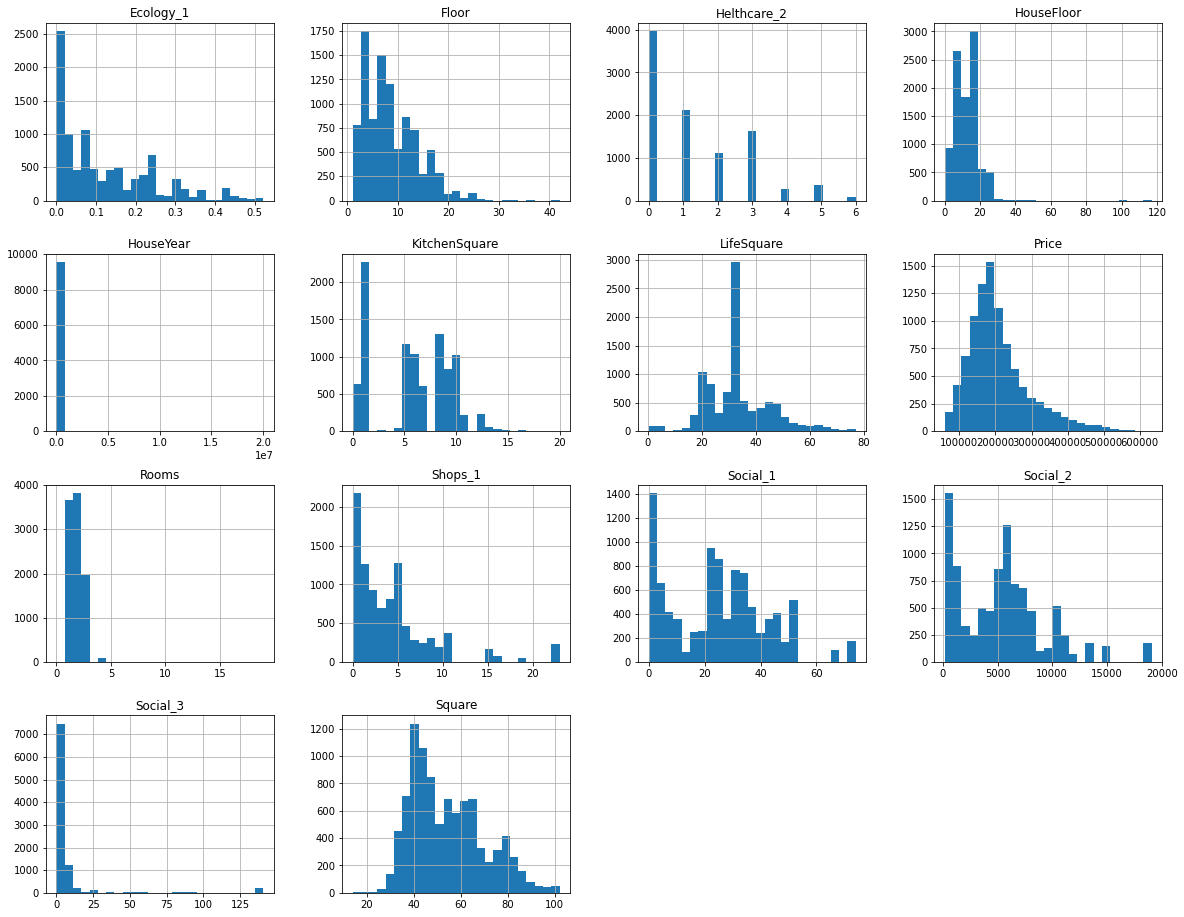

In [1876]:
df_features = df.select_dtypes(include=['float64', 'int64']).drop(['Id', 'DistrictId'], axis=1)
df_features.hist(figsize=(20,16),bins=25)

## Создание тренировачного и тестового датасета 

In [1890]:
df_test = pd.read_csv(TEST_DATASET_PATH)

In [1891]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [1892]:
features = df.columns.drop('Id').drop('DistrictId').drop('Price')
features.tolist()

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [1893]:
# заменяю выбросы  и  пропущенные значение на средние в тестовом ДС

featuers_obj(data_obj, df_test)
outliers_mean('Square',df_test)
outliers_mean('LifeSquare',df_test)
outliers_mean('KitchenSquare',df_test)
df_test['LifeSquare'] = df_test['LifeSquare'].fillna(df_test['LifeSquare'].median(axis=0),axis=0)

In [1894]:
# удаляю признак Healthcare_1 в детстовом ДС

df_test.drop(['Healthcare_1'], axis=1, inplace=True)

In [1895]:
target = 'Price'

In [1896]:
X = df[features]
y = df[target]

In [1897]:
features.tolist()

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2']

In [1898]:
X_test = df_test[features]

In [1899]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=22)

## Номинизируем

In [1900]:
for i in data_obj:
    print(df_test[i].value_counts())

False    4952
True       48
Name: Ecology_2, dtype: int64
False    4851
True      149
Name: Ecology_3, dtype: int64
False    4588
True      412
Name: Shops_2, dtype: int64


In [1901]:
scaler = StandardScaler()

In [1902]:
X_train_scaler = pd.DataFrame(scaler.fit_transform(X_train), columns=features)
X_valid_scaler = pd.DataFrame(scaler.transform(X_valid), columns=features)
X_test_scaler = pd.DataFrame(scaler.transform(X_test), columns=features)


In [1903]:
rf_model = RandomForestRegressor(n_estimators=2000, max_depth=25, max_features=5, random_state=42)
evaluate_pred(X_train_scaler, y_train, X_valid_scaler, y_valid, rf_model)

R2_train = 0.9635807992266676
R2_test = 0.7162489652719077


In [1904]:
price = rf_model.predict(X_test_scaler)

In [1906]:
pd.DataFrame({ 'Id': df_test['Id'], 'Price': price }).to_csv(TEST_DATASET_PRED_PATH, index=False)